<a href="https://colab.research.google.com/github/JuanPZ2000/IA_R-2/blob/main/semana6uwu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller. Descenso del gradiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
"""
Definamos aquí nuestra hipótesis
"""
def hipotesis(theta0,theta1,x):
  estimados = theta0 + theta1*x
  return estimados

In [3]:
"""
La presente función recibe dos arreglos tipo Numpy del mismo tamaño y
retorna la mitad del Error Cuadrático Medio de los dos array
"""
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

In [4]:
"""
Definamos los gradientes
"""
def gradienteTheta0(theta0Actual,theta1Actual,x,y):
  substra = hipotesis(theta0Actual,theta1Actual,x) - y
  pasoTheta0 = (1/x.shape[0])*(np.sum(substra))
  return pasoTheta0
def gradienteTheta1(theta0Actual,theta1Actual,x,y):
  pasoTheta1 = (1/x.shape[0])*np.sum((hipotesis(theta0Actual,theta1Actual,x)-y)*x)
  return pasoTheta1

In [5]:
"""
Un paso del gradiente
"""
def pasoDescensoGradiente(theta0Actual,theta1Actual,x,y,alpha):
  nuevoTheta0 = theta0Actual - alpha*gradienteTheta0(theta0Actual,theta1Actual,x,y)
  nuevoTheta1 = theta1Actual - alpha*gradienteTheta1(theta0Actual,theta1Actual,x,y)
  return (nuevoTheta0,nuevoTheta1)

## Apliquemoslo a nuestro problema

In [6]:
## Datos
x = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
y = np.array([0.169610271922408, 0.283395812542308, 0.386358737510785, 0.470227872390909, 0.433281293764675, 0.600267648212653, 0.738338980436742, 0.790315020494445, 0.877464268422459, 0.84356446225183, 0.96443891694455])

theta0 = 0.2
theta1 = 0.01


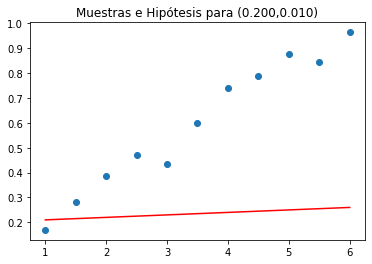

In [7]:
plt.scatter(x,y)
plt.plot(x,hipotesis(theta0,theta1,x),'r-')
plt.title("Muestras e Hipótesis para (%.3f,%.3f)"%(theta0,theta1))
plt.show()

 9.955446189646722e-12


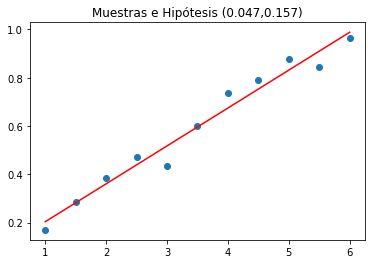

In [8]:
## Iteraciones
theta0 = 0.2
theta1 = 0.01
iter = 10000
alpha = (0.05/10)/10*2*2*2*2*2*2
J = list()
J.append(funcCosto(hipotesis(theta0,theta1,x),y))
for i in range(iter):
  # Para cada iteración calcular los nuevos parámetros de la hipótesis
  (theta0n,theta1n) = pasoDescensoGradiente(theta0,theta1,x,y,alpha)
  #print("diferencia: ",theta0n-theta0)
  J.append(funcCosto(hipotesis(theta0,theta1,x),y))
  if (np.abs(theta0n-theta0))<1e-11: # Criterio de parada por variación de paŕametros
    print("",np.abs(theta0n-theta0))
    break
  theta0 = theta0n
  theta1 = theta1n

plt.scatter(x,y)
plt.plot(x,hipotesis(theta0,theta1,x),'r-')
plt.title("Muestras e Hipótesis (%.3f,%.3f)"%(theta0,theta1))
plt.show()


In [9]:

def R2(f,y,x):
  SSres = sum((y-f)**2)
  yprom = 1/len(x) * sum(y)
  SSot = sum((y-yprom)**2)
  R2 = 1 - (SSres/SSot)
  return R2
f = theta0 + theta1*x
print(R2(f,y,x))


0.9678913144832825
